In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from scipy.stats import ttest_ind, iqr

# Auxiliar functions

In [2]:
# plot
def boxplot(colname: str, ylabel: str, title: str):

    micro = [svm_bert_results[colname].values, 
             knn_bert_results[colname].values,
             svm_tfidf_results[colname].values,
             knn_tfidf_results[colname].values]
    labels = ['SVM/BERT', 'KNN/BERT', 'SVM/TF-IDF', 'KNN/TF-IDF']

    b1 = plt.boxplot(micro, vert=True, patch_artist=True, labels=labels)

    colors = ['pink', 'lightblue', 'lightgreen', 'lightsteelblue']

    for patch, color in zip(b1['boxes'], colors):
        patch.set_facecolor(color)

    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y')
    plt.show()


def remove_outlier(x):
    lower = np.quantile(x, 0.25) - 1.5 * iqr(x)
    upper = np.quantile(x, 0.75) + 1.5 * iqr(x)
    return x[(x >= lower) & (x <= upper)]

# 1. Results

To select the configuration to use, let's multiply f1 micro by f1 macro. The best result, that is, the one with the highest value will be chosen.

## 1.1 KNN

### 1.1.1 BERT

In [3]:
# reading KNN-BERT results
with open('output/results/knn/bert_results.json', 'r') as f:
    result = json.loads(f.read())

In [4]:
# computing the averages
knn_bert_results = defaultdict(lambda: defaultdict(float))
for ki in result.keys():
    for kj in result[ki].keys():
        knn_bert_results[ki][kj] = np.mean(result[ki][kj])

In [5]:
# weighting f1 micro and f1 macro
knn_bert_results = pd.DataFrame(knn_bert_results).T.reset_index()
knn_bert_results['weighted'] = knn_bert_results.micro * knn_bert_results.macro
knn_bert_results = knn_bert_results.sort_values('weighted', ascending=False)
knn_bert_results.round(3).head()

,index,exec_time,micro,macro,weighted
33,11 - uniform - euclidean,0.340,0.728,0.318,0.232
9,5 - uniform - euclidean,0.337,0.706,0.327,0.231
25,9 - uniform - euclidean,0.340,0.724,0.317,0.230
13,6 - uniform - euclidean,0.337,0.711,0.320,0.227
21,8 - uniform - euclidean,0.338,0.720,0.315,0.227


The selected configuration is:

- n_neighbors = 11
- weights = uniform
- metric = euclidean

### 1.1.2 TF-IDF

In [6]:
# reading KNN-TF-IDF results
with open('output/results/knn/tf_idf_results.json', 'r') as f:
    result = json.loads(f.read())

In [7]:
# computing the averages
knn_tfidf_results = defaultdict(lambda: defaultdict(float))
for ki in result.keys():
    for kj in result[ki].keys():
        knn_tfidf_results[ki][kj] = np.mean(result[ki][kj])

In [8]:
# weighting f1 micro and f1 macro
knn_tfidf_results = pd.DataFrame(knn_tfidf_results).T.reset_index()
knn_tfidf_results['weighted'] = knn_tfidf_results.micro * knn_tfidf_results.macro
knn_tfidf_results = knn_tfidf_results.sort_values('weighted', ascending=False)
knn_tfidf_results.round(3).head()

,index,exec_time,micro,macro,weighted
44,14 - uniform - cosine,0.564,0.702,0.302,0.212
36,12 - uniform - cosine,0.562,0.695,0.304,0.211
24,9 - uniform - cosine,0.558,0.691,0.304,0.210
40,13 - uniform - cosine,0.561,0.699,0.299,0.209
48,15 - uniform - cosine,0.571,0.697,0.299,0.208


The selected configuration is:

- n_neighbors = 14
- weights = uniform
- metric = cosine

## 1.2 SVM

### 1.2.1 BERT

In [9]:
# reading SVM-BERT results
with open('output/results/svm/bert_results.json', 'r') as f:
    result = json.loads(f.read())

In [10]:
# computing the averages
svm_bert_results = defaultdict(lambda: defaultdict(float))
for ki in result.keys():
    for kj in result[ki].keys():
        svm_bert_results[ki][kj] = np.mean(result[ki][kj])

In [11]:
# weighting f1 micro and f1 macro
svm_bert_results = pd.DataFrame(svm_bert_results).T.reset_index()
svm_bert_results['weighted'] = svm_bert_results.micro * svm_bert_results.macro
svm_bert_results = svm_bert_results.sort_values('weighted', ascending=False)
svm_bert_results.round(3).head()

,index,exec_time,micro,macro,weighted
2,0.1 - 0.1 - linear,2.752,0.752,0.366,0.275
0,0.1 - 1 - linear,2.761,0.752,0.364,0.274
4,0.1 - 0.01 - linear,2.741,0.749,0.365,0.274
6,0.1 - 0.001 - linear,2.753,0.750,0.355,0.267
21,10 - 0.01 - rbf,3.857,0.729,0.356,0.260


The selected configuration is:

- C = 0.1
- gamma = 0.1
- kernel = linear

### 1.2.2 TF-IDF

In [12]:
# reading SVM-TF-IDF results
with open('output/results/svm/tf_idf_results.json', 'r') as f:
    result = json.loads(f.read())

In [13]:
# computing the averages
svm_tfidf_results = defaultdict(lambda: defaultdict(float))
for ki in result.keys():
    for kj in result[ki].keys():
        svm_tfidf_results[ki][kj] = np.mean(result[ki][kj])

In [14]:
# weighting f1 micro and f1 macro
svm_tfidf_results = pd.DataFrame(svm_tfidf_results).T.reset_index()
svm_tfidf_results['weighted'] = svm_tfidf_results.micro * svm_tfidf_results.macro
svm_tfidf_results = svm_tfidf_results.sort_values('weighted', ascending=False)
svm_tfidf_results.head()

,index,exec_time,micro,macro,weighted
20,10 - 0.01 - linear,56.786533,0.698501,0.341466,0.238515
8,1 - 1 - linear,60.174103,0.736354,0.323596,0.238281
14,1 - 0.001 - linear,60.607197,0.734162,0.321927,0.236347
12,1 - 0.01 - linear,60.425014,0.735215,0.321233,0.236176
16,10 - 1 - linear,56.592804,0.695435,0.336159,0.233776


The selected configuration is:

- C = 10
- gamma = 0.1
- kernel = linear

# 2. t-test

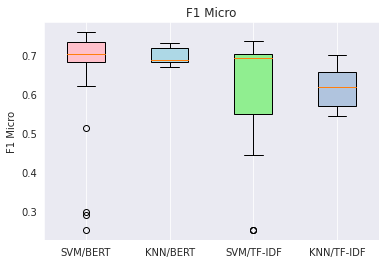

In [15]:
# plotting F1 micro
boxplot(colname='micro', ylabel='F1 Micro', title='F1 Micro')

In [16]:
# removing outliers and t-test - BERT
ttest_ind(remove_outlier(svm_bert_results.micro.values),
          remove_outlier(knn_bert_results.micro.values),
          alternative='greater')[1]

0.01137885204223082

In [17]:
# removing outliers and t-test - BERT
ttest_ind(remove_outlier(svm_tfidf_results.micro.values),
          remove_outlier(knn_tfidf_results.micro.values),
          alternative='greater')[1]

0.025284142680663067

In [18]:
# removing outliers and t-test - KNN/BERT - KNN/TFIDF
ttest_ind(remove_outlier(knn_bert_results.micro.values),
          remove_outlier(knn_tfidf_results.micro.values),
          alternative='greater')[1]

1.3381588624646372e-17

In [19]:
# removing outliers and t-test - SVM/BERT - SVM/TFIDF
ttest_ind(remove_outlier(svm_bert_results.micro.values),
          remove_outlier(svm_tfidf_results.micro.values),
          alternative='greater')[1]

0.00457075516166568

F1 Micro results for SVM is statistically better than KNN with BERT and TF-IDF for the tested configurations.

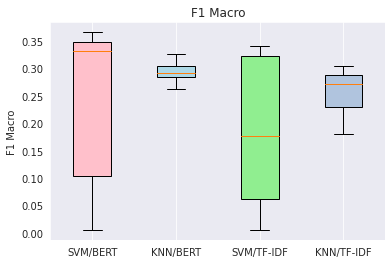

In [20]:
# plotting F1 macro
boxplot(colname='macro', ylabel='F1 Macro', title='F1 Macro')

In [21]:
# removing outliers and t-test - BERT
ttest_ind(remove_outlier(svm_bert_results.macro.values),
          remove_outlier(knn_bert_results.macro.values),
          alternative='less')[1]

0.01327758876418086

In [22]:
# removing outliers and t-test - BERT
ttest_ind(remove_outlier(svm_tfidf_results.macro.values),
          remove_outlier(knn_tfidf_results.macro.values),
          alternative='less')[1]

0.0004685866907476456

In [23]:
# removing outliers and t-test - KNN/BERT - KNN/TFIDF
ttest_ind(remove_outlier(knn_bert_results.macro.values),
          remove_outlier(knn_tfidf_results.macro.values),
          alternative='greater')[1]

2.0641932217230627e-09

In [24]:
# removing outliers and t-test - SVM/BERT - SVM/TFIDF
ttest_ind(remove_outlier(svm_bert_results.macro.values),
          remove_outlier(svm_tfidf_results.macro.values),
          alternative='greater')[1]

0.056330227875522304

The F1 Macro results for SVM is statistically lower than KNN with BERT and TF-IDF for the tested configurations.